- Promediar seis columnas de ingresos por vivienda y hogares que la conforman.
- Decidir qué hacer con los ceros y valores nulos.

In [ ]:
import pandas as pd
import numpy as np


ingresos_df = pd.read_csv('/content/conjunto_de_datos_ingresos_enigh_2018_ns.csv',na_values=' ')
ingresos_df = ingresos.replace(0,np.nan)

In [ ]:

ingresos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348487 entries, 0 to 348486
Data columns (total 17 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   folioviv  348487 non-null  int64  
 1   foliohog  348487 non-null  int64  
 2   numren    348487 non-null  int64  
 3   clave     348487 non-null  object 
 4   mes_1     293393 non-null  float64
 5   mes_2     293393 non-null  float64
 6   mes_3     293393 non-null  float64
 7   mes_4     293393 non-null  float64
 8   mes_5     293393 non-null  float64
 9   mes_6     293393 non-null  float64
 10  ing_1     290523 non-null  float64
 11  ing_2     204955 non-null  float64
 12  ing_3     207296 non-null  float64
 13  ing_4     194226 non-null  float64
 14  ing_5     199430 non-null  float64
 15  ing_6     190507 non-null  float64
 16  ing_tri   348487 non-null  float64
dtypes: float64(13), int64(3), object(1)
memory usage: 45.2+ MB


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


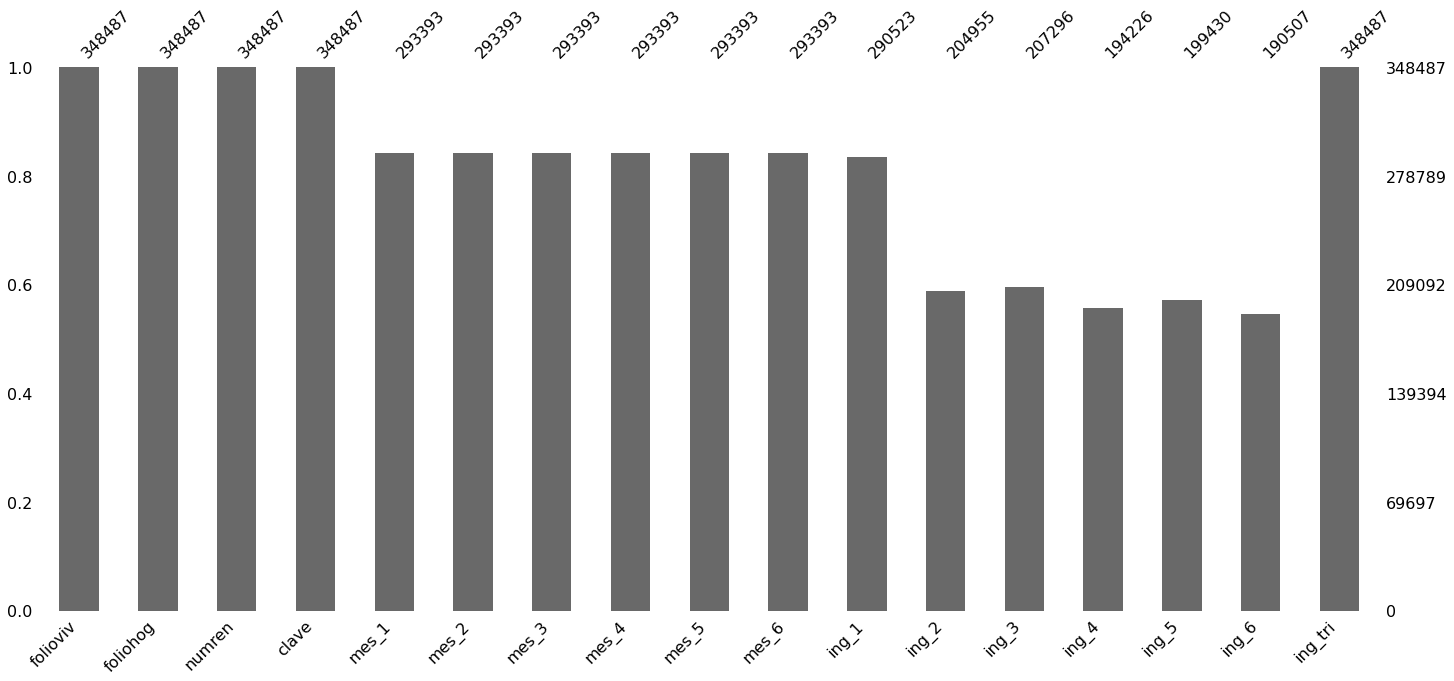

In [ ]:
import missingno as msno

msno.bar(ingresos_df)

In [ ]:
ingresos_df.isnull().sum() 

folioviv         0
foliohog         0
numren           0
clave            0
mes_1        55094
mes_2        55094
mes_3        55094
mes_4        55094
mes_5        55094
mes_6        55094
ing_1        57964
ing_2       143532
ing_3       141191
ing_4       154261
ing_5       149057
ing_6       157980
ing_tri          0
dtype: int64

In [ ]:
#Hacemos un melt de las seis columnas de ingreso para que queden en una sola columna utilizando folioviv como índice. 
ingresos_viv = pd.melt(ingresos, id_vars=['folioviv'], value_vars=['ing_1', 'ing_2', 'ing_3', 'ing_4', 'ing_5','ing_6'])
ingresos_viv.sample(n=6)

,folioviv,variable,value
792061,860182907,ing_3,2400.0
1694645,2806054401,ing_5,16000.0
1762903,260116010,ing_6,10000.0
1761346,260046924,ing_6,NaN
1084786,400910502,ing_4,150.0
620573,2504440709,ing_2,NaN


In [ ]:
#Agrupamos por folioviv y calculamos la media de la columna que salió del melt.
#Cambiamos nombre de columna agregada a "ingreso_promedio".
ingresos_viv = ingresos_viv.groupby('folioviv').mean()
ingresos_viv = ingresos_viv.rename(columns={"value": "ingreso_promedio"})
ingresos_viv.head(20)

,ingreso_promedio
folioviv,
100013601,6185.714286
100013602,1337.320000
100013603,11883.333333
100013604,4730.769231
100013606,7325.000000
100026701,12444.444444
100026703,8000.000000
100026704,25714.285714
100026706,3290.909091


In [ ]:
print(ingresos_viv.shape)
print(ingresos_df.shape)

(73355, 1)
(348487, 17)
